# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [26]:
df = pd.read_csv('../data/states_edu.csv')
print(df.tail())


             PRIMARY_KEY          STATE  YEAR  ENROLL  TOTAL_REVENUE  \
1710       2019_VIRGINIA       VIRGINIA  2019     NaN            NaN   
1711     2019_WASHINGTON     WASHINGTON  2019     NaN            NaN   
1712  2019_WEST_VIRGINIA  WEST_VIRGINIA  2019     NaN            NaN   
1713      2019_WISCONSIN      WISCONSIN  2019     NaN            NaN   
1714        2019_WYOMING        WYOMING  2019     NaN            NaN   

      FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
1710              NaN            NaN            NaN                NaN   
1711              NaN            NaN            NaN                NaN   
1712              NaN            NaN            NaN                NaN   
1713              NaN            NaN            NaN                NaN   
1714              NaN            NaN            NaN                NaN   

      INSTRUCTION_EXPENDITURE  ...  GRADES_4_G  GRADES_8_G  GRADES_12_G  \
1710                      NaN  ...         NaN 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

**Grade 4 Math**

How many years of data are logged in our dataset? 

33

In [27]:
# @@@ 1
# Your Code
print(df['YEAR'].nunique())

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [31]:
# @@@ 2

michigan_avg = df[df['STATE']=='MICHIGAN']['AVG_MATH_4_SCORE'].mean()
ohio_avg = df[df['STATE']=='OHIO']['AVG_MATH_4_SCORE'].mean()
print("Michigan Average:", michigan_avg)
print("Ohio Average:", ohio_avg)

if michigan_avg > ohio_avg:
    print("Michigan has a higher average Grade 4 Math score than Ohio.")
    print("The difference is:", michigan_avg - ohio_avg)
elif michigan_avg < ohio_avg:
    print("Ohio has a higher average Grade 4 Math score than Michigan.")
    print("The difference is:", ohio_avg - michigan_avg)
else:
    print("Both states have the same average Grade 4 Math score.")


Michigan Average: 234.36363636363637
Ohio Average: 239.45454545454547
Ohio has a higher average Grade 4 Math score than Michigan.
The difference is: 5.0909090909090935


Find the average for your chosen test across all states in 2019

In [32]:
# @@@ 3
avg_2019 = df[df['YEAR'] == 2019]['AVG_MATH_4_SCORE'].mean()
print("Average Grade 4 Math score across all states in 2019:", avg_2019)


Average Grade 4 Math score across all states in 2019: 239.9433962264151


For each state, find a maximum value for your chosen test score

In [33]:
# @@@ 4
max_scores = df.groupby('STATE')['AVG_MATH_4_SCORE'].max()
print(max_scores)


STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [48]:
# @@@ 5

df['ENROLL'] = df['ENROLL'].fillna(np.nan)
df['TOTAL_EXPENDITURE'] = df['TOTAL_EXPENDITURE'].fillna(np.nan)

df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']
df.loc[df['ENROLL'] == 0, 'EXPENDITURE_PER_STUDENT'] = np.nan

# Exclude all states (rows) that have any NaN in relevant columns
df_clean = df.dropna(subset=['ENROLL', 'TOTAL_EXPENDITURE', 'EXPENDITURE_PER_STUDENT'])

print(df_clean[['STATE', 'YEAR', 'EXPENDITURE_PER_STUDENT']].tail())

              STATE  YEAR  EXPENDITURE_PER_STUDENT
1270       VIRGINIA  2016                12.853611
1271     WASHINGTON  2016                14.071657
1272  WEST_VIRGINIA  2016                12.164031
1273      WISCONSIN  2016                13.742614
1274        WYOMING  2016                21.523727


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

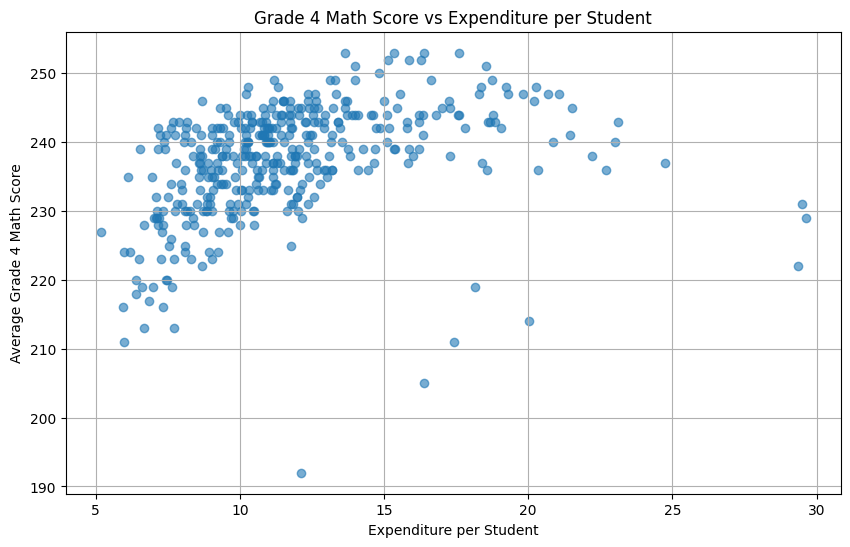

In [49]:
# @@@ 6

plt.figure(figsize=(10,6))
plt.scatter(df_clean['EXPENDITURE_PER_STUDENT'], df_clean['AVG_MATH_4_SCORE'], alpha=0.6)
plt.xlabel('Expenditure per Student')
plt.ylabel('Average Grade 4 Math Score')
plt.title('Grade 4 Math Score vs Expenditure per Student')
plt.grid(True)
plt.show()

**<CAPTION FOR VIZ 1>**

# Visualization 1: Relationship between Grade 4 Math score and Expenditure per Student

**Visualization 2**

/var/folders/12/hzz8_kb11kj5r92jvvxs3yx80000gn/T/ipykernel_13931/3283022553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['STUDENT_TEACHER_RATIO'] = df_clean['ENROLL'] / df_clean['GRADES_4_G']  # Example: using GRADES_4_G as proxy for teachers if no TEACHERS column exists


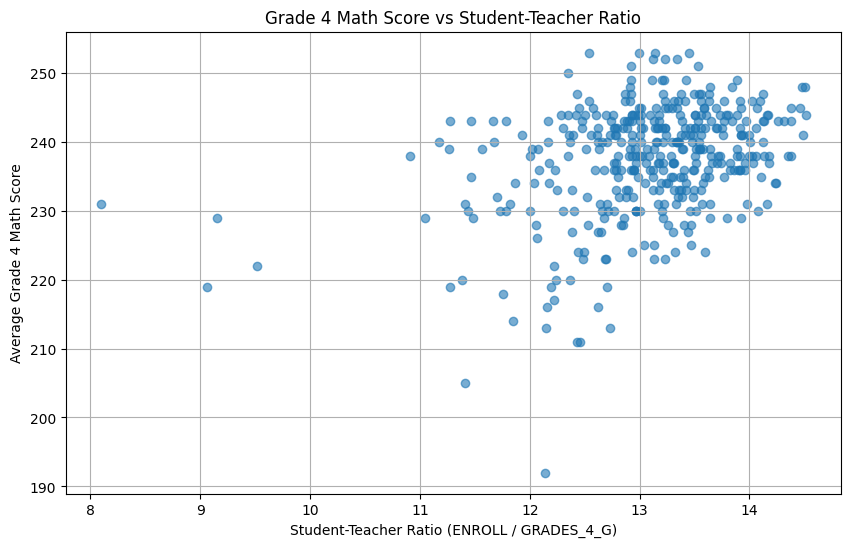

In [54]:
# @@@ 7

df_clean['STUDENT_TEACHER_RATIO'] = df_clean['ENROLL'] / df_clean['GRADES_4_G']  # Example: using GRADES_4_G as proxy for teachers if no TEACHERS column exists

plt.figure(figsize=(10,6))
plt.scatter(df_clean['STUDENT_TEACHER_RATIO'], df_clean['AVG_MATH_4_SCORE'], alpha=0.6)
plt.xlabel('Student-Teacher Ratio (ENROLL / GRADES_4_G)')
plt.ylabel('Average Grade 4 Math Score')
plt.title('Grade 4 Math Score vs Student-Teacher Ratio')
plt.grid(True)
plt.show()

**<CAPTION FOR VIZ 2>**

# Visualization 2: Relationship between Grade 4 Math score and Student-Teacher Ratio


<h2> Data Creation </h2>

_Use this space to create train/test data_

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# @@@ 8


X = df_clean[['EXPENDITURE_PER_STUDENT', 'STUDENT_TEACHER_RATIO']]
y = df_clean['AVG_MATH_4_SCORE']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set size:', X_train.shape)
print('Test set size:', X_test.shape)

Training set size: (979, 2)
Test set size: (245, 2)


In [58]:
# @@@ 9 


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [63]:
# @@@ 10
# Import LinearRegression from sklearn for prediction
from sklearn.linear_model import LinearRegression

In [65]:
# @@@ 11
# Create and fit the Linear Regression model
X_train_clean = X_train[~y_train.isna()]
y_train_clean = y_train[~y_train.isna()]

model.fit(X_train_clean, y_train_clean)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
model = LinearRegression()


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [82]:
# @@@ 12
# Evaluate model performance using R^2, MAE, and RMSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


from sklearn.linear_model import LinearRegression
if not hasattr(model, 'coef_'):
    model.fit(X_train_clean, y_train_clean)


X_test_clean = X_test[~y_test.isna()]
y_test_clean = y_test[~y_test.isna()]


y_pred = model.predict(X_test_clean)


r2 = r2_score(y_test_clean, y_pred)
print(f"R^2 Score: {r2:.3f}")


mae = mean_absolute_error(y_test_clean, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.3f}")


rmse = np.sqrt(mean_squared_error(y_test_clean, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

R^2 Score: 0.184
Mean Absolute Error (MAE): 5.149
Root Mean Squared Error (RMSE): 7.614


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

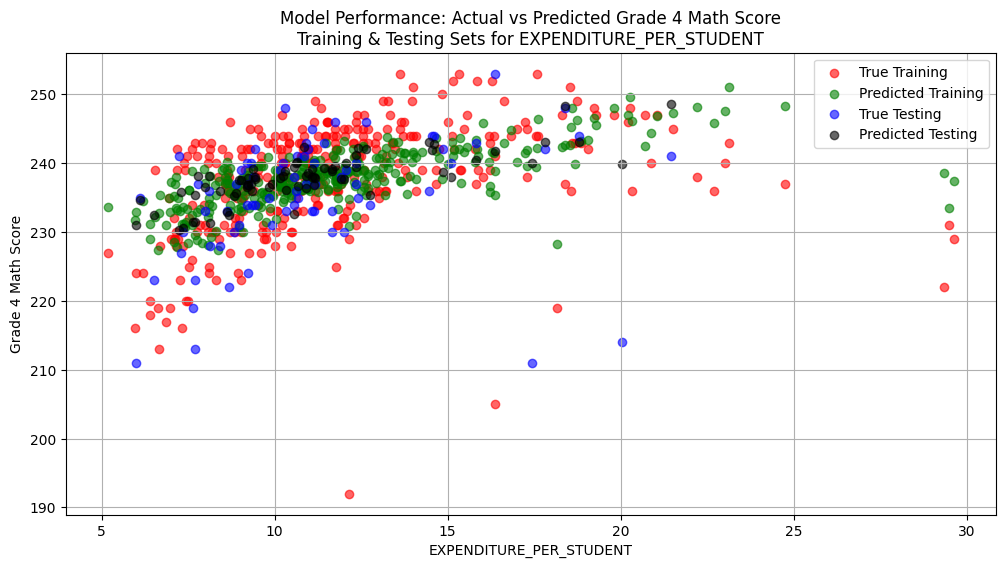

In [83]:
# @@@ 13
# Combined plot: Training vs Testing, Actual vs Predicted for a single predictor
col_name = 'EXPENDITURE_PER_STUDENT'  # You can also use 'STUDENT_TEACHER_RATIO'

plt.figure(figsize=(12,6))
plt.scatter(X_train_clean[col_name], y_train_clean, color="red", alpha=0.6, label='True Training')
plt.scatter(X_train_clean[col_name], model.predict(X_train_clean), color="green", alpha=0.6, label='Predicted Training')
plt.scatter(X_test_clean[col_name], y_test_clean, color="blue", alpha=0.6, label='True Testing')
plt.scatter(X_test_clean[col_name], model.predict(X_test_clean), color="black", alpha=0.6, label='Predicted Testing')

plt.legend()
plt.xlabel(col_name)
plt.ylabel('Grade 4 Math Score')
plt.title(f"Model Performance: Actual vs Predicted Grade 4 Math Score\nTraining & Testing Sets for {col_name}")
plt.grid(True)
plt.show()

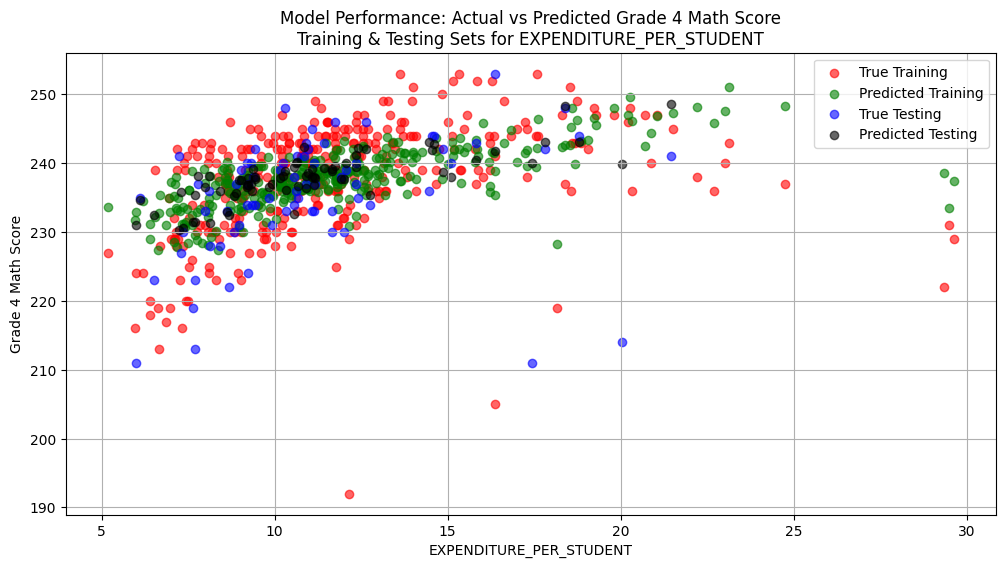

In [80]:
# @@@ 14
# Combined plot: Training vs Testing, Actual vs Predicted for a single predictor
# Ensure model is fitted before plotting
from sklearn.linear_model import LinearRegression
if not hasattr(model, 'coef_'):
    model.fit(X_train_clean, y_train_clean)

col_name = 'EXPENDITURE_PER_STUDENT' 

plt.figure(figsize=(12,6))
plt.scatter(X_train_clean[col_name], y_train_clean, color="red", alpha=0.6, label='True Training')
plt.scatter(X_train_clean[col_name], model.predict(X_train_clean), color="green", alpha=0.6, label='Predicted Training')
plt.scatter(X_test_clean[col_name], y_test_clean, color="blue", alpha=0.6, label='True Testing')
plt.scatter(X_test_clean[col_name], model.predict(X_test_clean), color="black", alpha=0.6, label='Predicted Testing')

plt.legend()
plt.xlabel(col_name)
plt.ylabel('Grade 4 Math Score')
plt.title(f"Model Performance: Actual vs Predicted Grade 4 Math Score\nTraining & Testing Sets for {col_name}")
plt.grid(True)
plt.show()